<a href="https://www.kaggle.com/code/rishukumargupta/stroke-prediction?scriptVersionId=135002277" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


In [2]:
df=pd.read_csv('/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [3]:
df.shape

(5110, 12)

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [6]:
df.sample(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
810,23016,Male,55.00,0,0,Yes,Private,Rural,86.60,26.5,never smoked,0
4145,34285,Male,57.00,0,0,Yes,Private,Rural,92.59,24.2,Unknown,0
3391,63898,Female,53.00,1,0,Yes,Private,Urban,240.86,31.9,never smoked,0
2636,13764,Female,74.00,0,0,Yes,Private,Urban,116.04,30.9,never smoked,0
996,53279,Male,0.24,0,0,No,children,Rural,118.87,16.3,Unknown,0


In [7]:
df=df.drop(columns='id')

In [8]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# DATA PREPARATION

> 1. Data Clearning
> 2. Data Exporation
> 3. Data Spliting
> 4. Traing Model
> 5. Evaluate The Model
> 6. Improve The Model



## 1. Data Cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [11]:
bmi_mean=df['bmi'].mean()

In [12]:
df['bmi']=df['bmi'].fillna(bmi_mean)

In [13]:
df['bmi'].isnull().sum()

0

In [14]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [15]:
df.duplicated().sum()

0

## 2. Data Exporation

In [16]:
#importing the required library for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
num_var=[]
cat_var=[]

for c in df.columns:
    if df[c].dtype == 'int64' or df[c].dtype == 'float64':
        num_var.append(c)
        
for c in df.columns:
    if df[c].dtype == 'object':
        cat_var.append(c)  

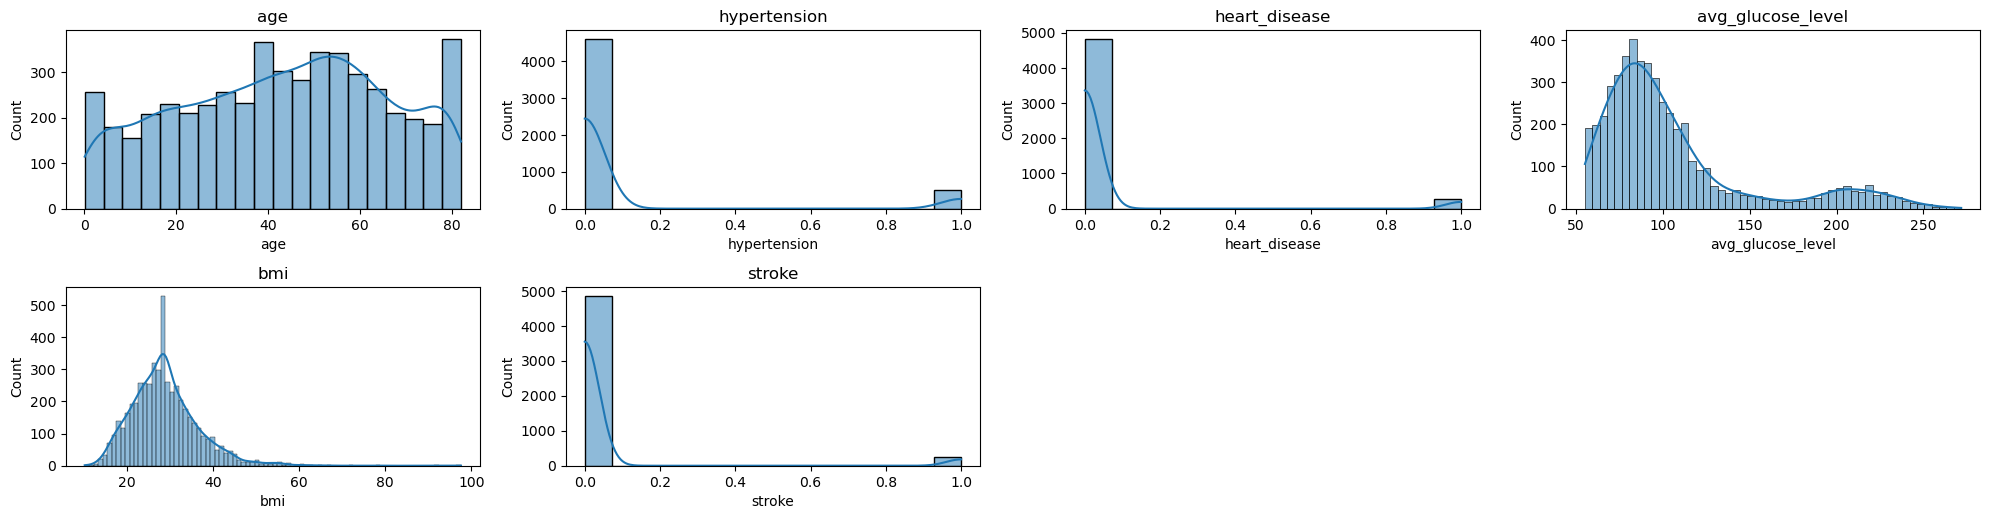

In [18]:
plt.figure(figsize=(20,10))
for i, var in enumerate(num_var):
    plt.subplot(4, 4, i+1)
    sns.histplot(df[var], kde=True)
    plt.title(var)

plt.tight_layout()
plt.show()

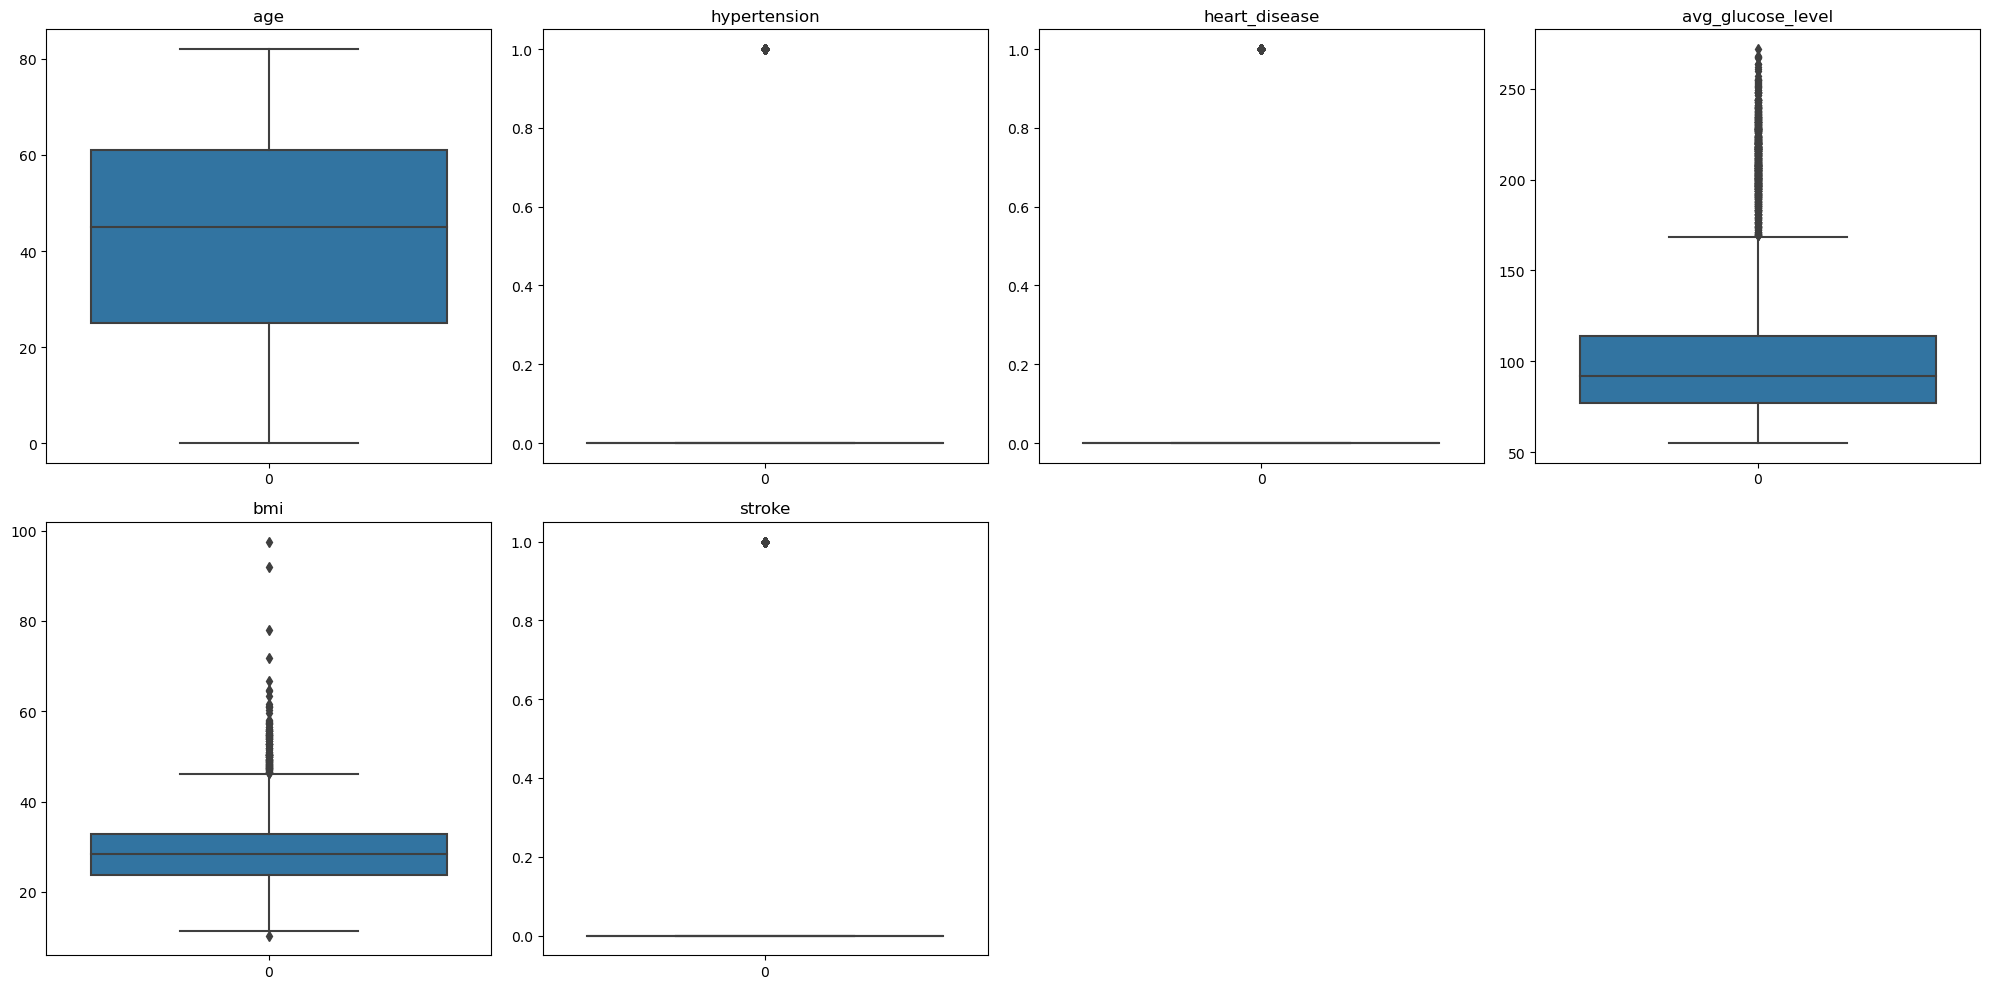

In [19]:
plt.figure(figsize=(20,10))
for i ,var in enumerate(num_var):
    plt.subplot(2,4,i+1)
    sns.boxplot(df[var])
    plt.title(var)
    
plt.tight_layout()
plt.show()

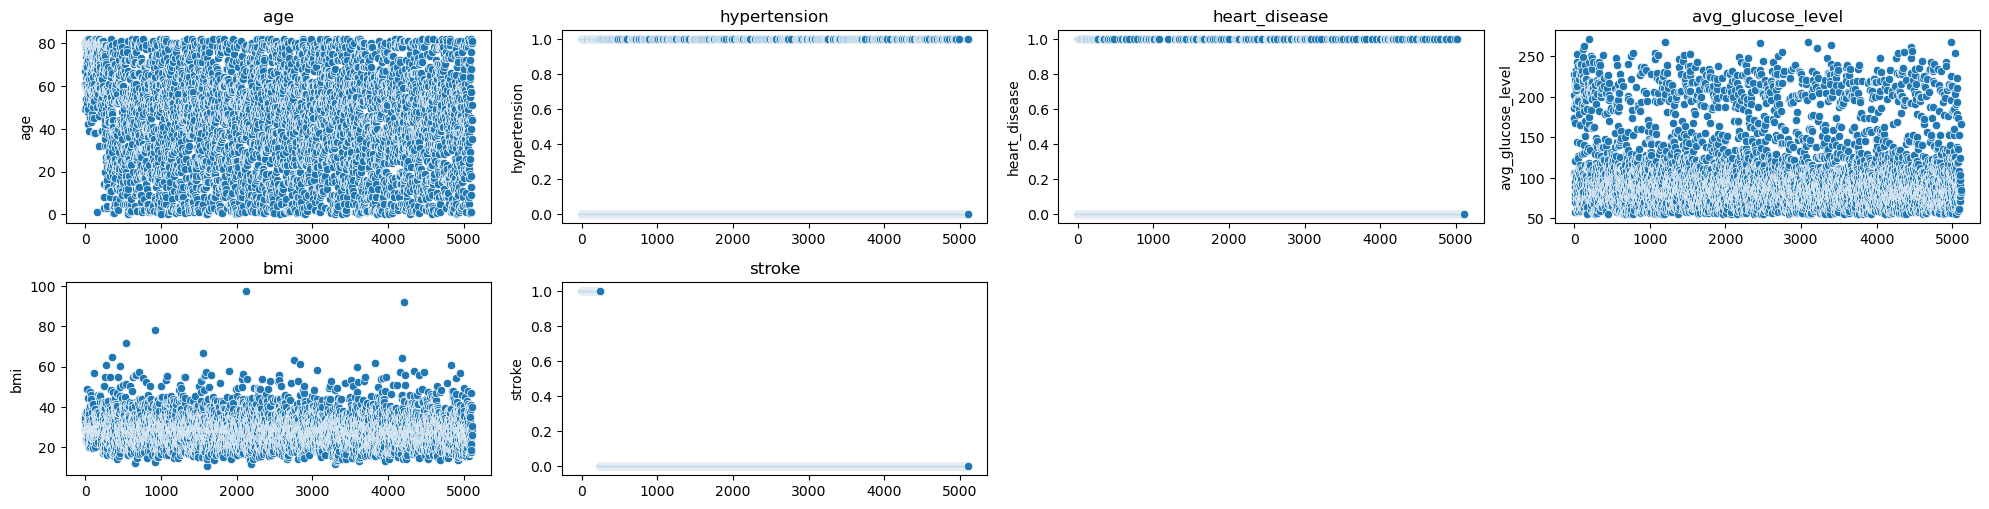

In [20]:
plt.figure(figsize=(20,10))

for i,var in enumerate(num_var):
    plt.subplot(4,4,i+1)
    sns.scatterplot(df[var])
    plt.title(var)
    
plt.tight_layout()    
plt.show()

<Axes: >

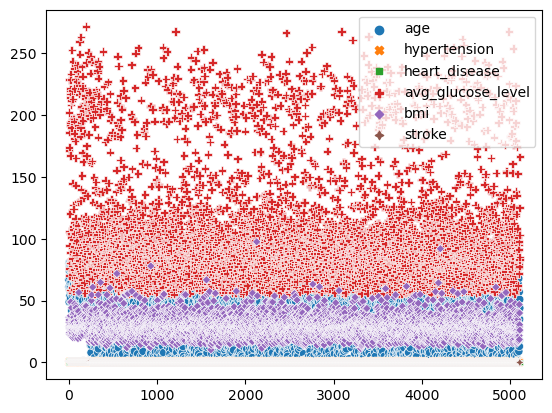

In [21]:
sns.scatterplot(df)

<Axes: >

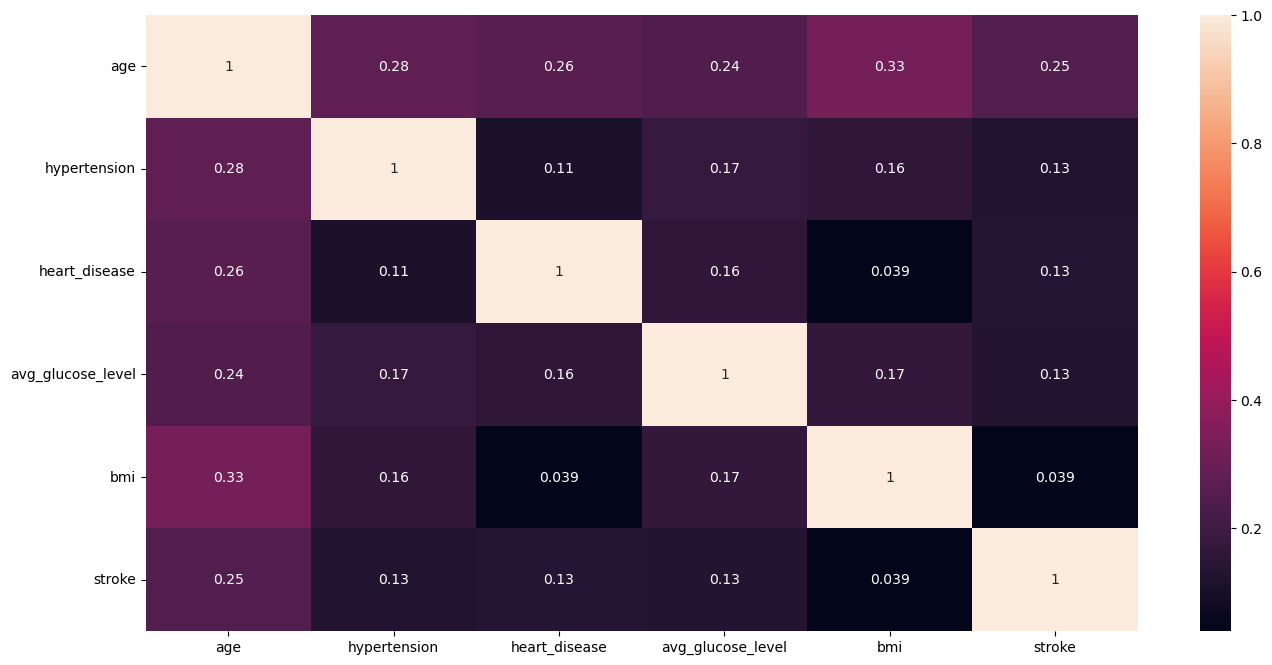

In [22]:
plt.figure(figsize=(16,8))
sns.heatmap(df[num_var].corr(),annot=True)

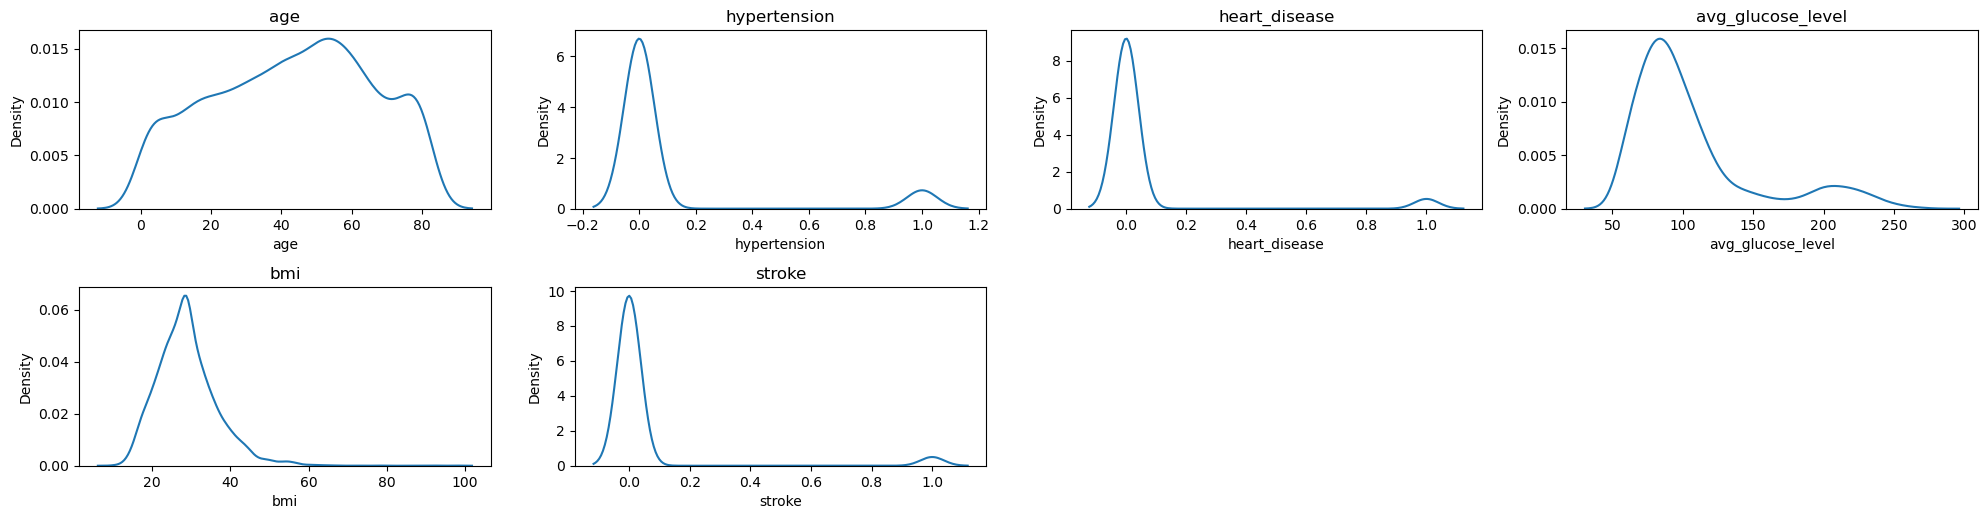

In [23]:
plt.figure(figsize=(20,10))
for i, var in enumerate(num_var):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(df[var])
    plt.title(var)

plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

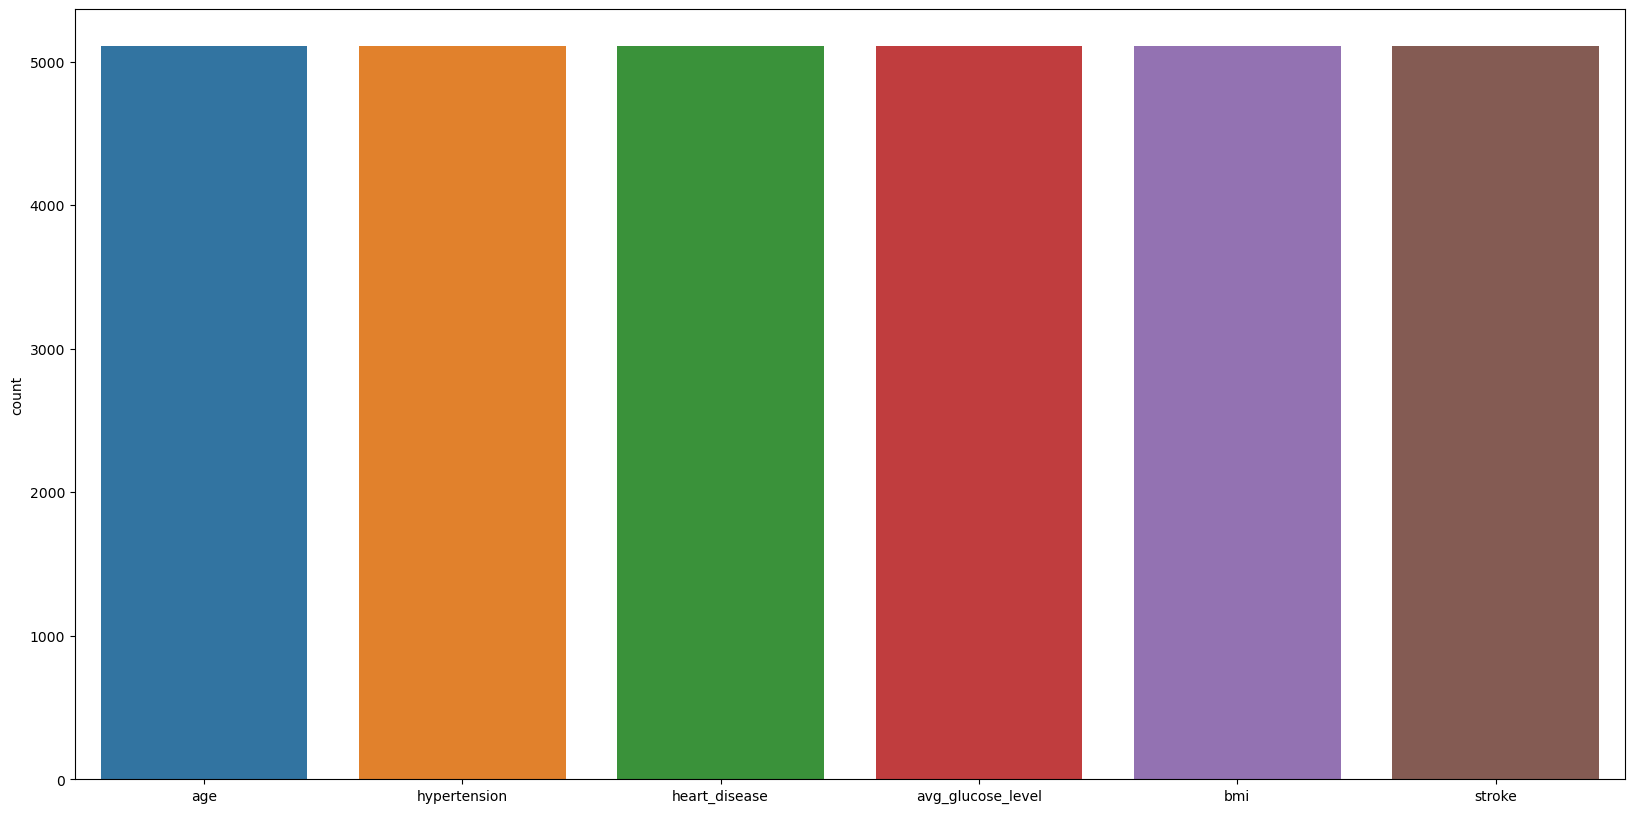

In [24]:
plt.figure(figsize=(20,10))
sns.countplot(df)

## 3. Data Spliting

In [25]:
##importing the required library
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay

In [26]:
X=df.drop(columns='stroke')
y=df['stroke']

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=50)

## 4. Train Model with Different Algorithms

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
lgr=LogisticRegression()

In [30]:
X_test['gender'].unique()

array(['Male', 'Female'], dtype=object)

In [31]:
tf1=ColumnTransformer(transformers=[
    ('onh',OneHotEncoder(),[0,4,5,6,9]),
],remainder="passthrough")

In [32]:
tf2=ColumnTransformer(transformers=[
    ('tf1',StandardScaler(),slice(0,None))
],remainder="passthrough")

**Logistic Regression**

In [33]:
pipe_lgr=Pipeline([
    ('onh',tf1),
    ('std',tf2),
    ('logisticReg',lgr),
])

In [34]:
pipe_lgr.fit(X_train,y_train)

Pipeline(steps=[('onh',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4, 5, 6, 9])])),
                ('std',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', StandardScaler(),
                                                  slice(0, None, None))])),
                ('logisticReg', LogisticRegression())])

In [35]:
y_pred_lgr=pipe_lgr.predict(X_test)

In [36]:
accuracy_score(y_test,y_pred_lgr)

0.9530332681017613

## Model Evaluation

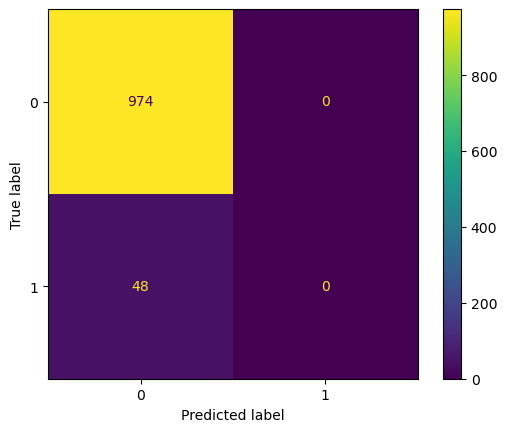

In [37]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_lgr)).plot()

In [38]:
print(classification_report(y_test,y_pred_lgr))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       974
           1       0.00      0.00      0.00        48

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Improve The Model

In [39]:
# Create the parameter grid
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

In [40]:
# Create the GridSearchCV instance
gs_lr = GridSearchCV(lgr, param_grid, cv=5)

In [41]:
# Fit the GridSearchCV
pipe_gs_lgr=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('gs_lr',gs_lr)
])

In [42]:
pipe_gs_lgr.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which 

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4, 5, 6, 9])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', StandardScaler(),
                                                  slice(0, None, None))])),
                ('gs_lr',
                 GridSearchCV(cv=5, estimator=LogisticRegression(),
                              param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                          'penalty': ['l1', 'l2'],
                                          'solver': ['liblinear', 'saga']}))])

In [43]:
gs_lr.best_params_

{'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}

In [44]:
pipe_gs_lgr.score(X_train,y_train)

0.9510763209393346

In [45]:
y_pred_gslgr=pipe_gs_lgr.predict(X_test)

In [46]:
accuracy_score(y_test,y_pred_gslgr)

0.9530332681017613

In [47]:
print(classification_report(y_test,y_pred_gslgr))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       974
           1       0.00      0.00      0.00        48

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**KNN Classifier**

In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn=KNeighborsClassifier(n_neighbors=10)

In [50]:
pipe_knn=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('knn',knn)
])

In [51]:
pipe_knn.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4, 5, 6, 9])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', StandardScaler(),
                                                  slice(0, None, None))])),
                ('knn', KNeighborsClassifier(n_neighbors=10))])

In [52]:
pipe_knn.score(X_train,y_train)

0.951320939334638

In [53]:
y_pred_knn=pipe_knn.predict(X_test)

In [54]:
accuracy_score(y_test,y_pred_knn)

0.9530332681017613

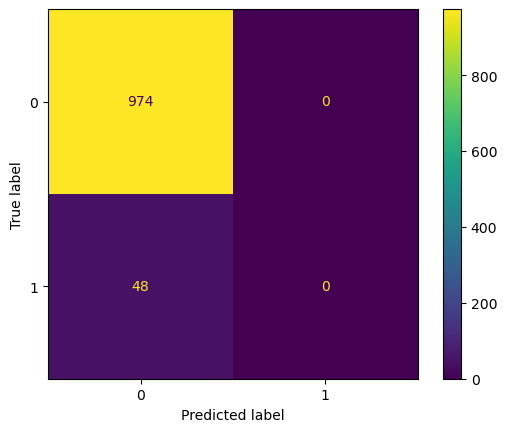

In [55]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_knn)).plot()

In [56]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       974
           1       0.00      0.00      0.00        48

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 10,
 'p': 2,
 'weights': 'uniform'}

## Improve The Modle
**Tuning the parameters using GridSearchCV**

In [58]:
params = [{'knn__n_neighbors': [3, 5, 7, 9],
         'knn__weights': ['uniform', 'distance'],
         'knn__leaf_size': [15, 20]}]

In [59]:
gs_knn = GridSearchCV(pipe_knn,
                      param_grid=params,
                      scoring='accuracy',
                      cv=5)

In [60]:
pipe_gs_knn=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('knn',gs_knn),
])

In [61]:
pipe_gs_knn.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4, 5, 6, 9])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', StandardScaler(),
                                                  slice(0, None, None))])),
                ('knn',
                 GridSearchCV(cv=5,
                              estimator=Pipeline(steps=[('tf1',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('onh',
                                                                                          OneHotEncoder(),
                                                                                          [0,
                                                                                           4,
                                                                                           5,
                                                                                           6,
                                                                                           9])])),
                                                        ('tf2',
                                                         ColumnTransformer(remainder='passthrough',
                                                                           transformers=[('tf1',
                                                                                          StandardScaler(),
                                                                                          slice(0, None, None))])),
                                                        ('knn',
                                                         KNeighborsClassifier(n_neighbors=10))]),
                              param_grid=[{'knn__leaf_size': [15, 20],
                                           'knn__n_neighbors': [3, 5, 7, 9],
                                           'knn__weights': ['uniform',
                                                            'distance']}],
                              scoring='accuracy'))])

In [62]:
gs_knn.best_params_

{'knn__leaf_size': 15, 'knn__n_neighbors': 5, 'knn__weights': 'uniform'}

In [63]:
pipe_gs_knn.score(X_train,y_train)

0.9530332681017613

In [64]:
knn_t=KNeighborsClassifier(n_neighbors=5,leaf_size=15,weights='uniform')

In [65]:
pipe_knn_t=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('knnt',knn_t)
])

In [66]:
pipe_knn_t.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4, 5, 6, 9])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', StandardScaler(),
                                                  slice(0, None, None))])),
                ('knnt', KNeighborsClassifier(leaf_size=15))])

In [67]:
pipe_knn_t.score(X_train,y_train)

0.9525440313111546

In [68]:
y_pred_knn_t=pipe_knn_t.predict(X_test)

In [69]:
accuracy_score(y_test,y_pred_knn_t)

0.952054794520548

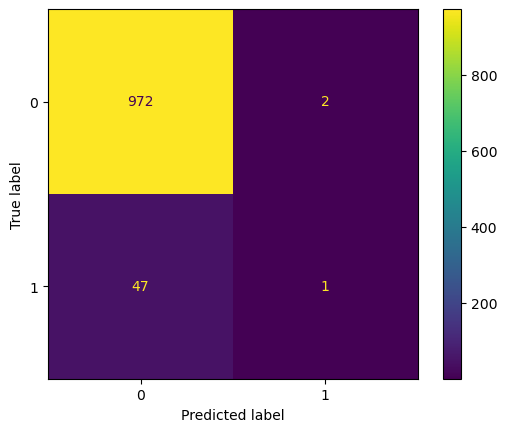

In [70]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_knn_t)).plot()

## Model Evaluatin

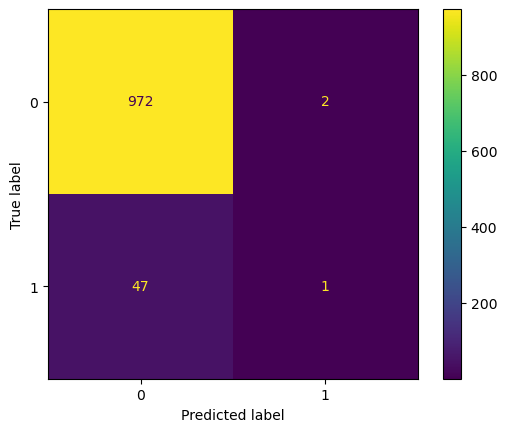

In [71]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_knn_t)).plot()

In [72]:
print(classification_report(y_test,y_pred_knn_t))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       974
           1       0.33      0.02      0.04        48

    accuracy                           0.95      1022
   macro avg       0.64      0.51      0.51      1022
weighted avg       0.92      0.95      0.93      1022



**Support Vector Machine**

In [73]:
from sklearn.svm import SVC

In [74]:
svc=SVC()

In [75]:
pipe_svc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('svc',svc)
])

In [76]:
pipe_svc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4, 5, 6, 9])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', StandardScaler(),
                                                  slice(0, None, None))])),
                ('svc', SVC())])

In [77]:
y_pred_svc=pipe_svc.predict(X_test)

In [78]:
accuracy_score(y_test,y_pred_svc)

0.9530332681017613

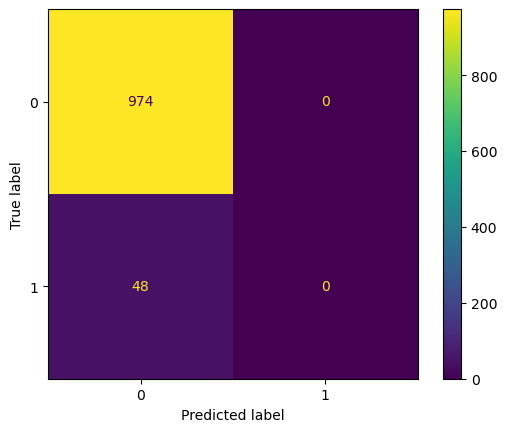

In [79]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_svc)).plot()

In [80]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': [0.1, 1, 'scale']
}

In [81]:
# Perform grid search using cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5)
pipe_gssvc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('gs_svc',grid_search)
])

In [82]:
pipe_gssvc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4, 5, 6, 9])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', StandardScaler(),
                                                  slice(0, None, None))])),
                ('gs_svc',
                 GridSearchCV(cv=5, estimator=SVC(),
                              param_grid={'C': [0.1, 1, 10],
                                          'gamma': [0.1, 1, 'scale'],
                                          'kernel': ['linear', 'rbf']}))])

In [83]:
# Get the best hyperparameters and model
grid_search.best_params_

# Evaluate the model on the testing set


{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [84]:
pipe_gssvc.score(X_train,y_train)

0.9508317025440313

In [85]:
svc1=SVC(C=0.1, gamma= 0.1, kernel='linear')

In [86]:
pipe_svc1=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('svc1',svc1)
])

In [87]:
pipe_svc1.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4, 5, 6, 9])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', StandardScaler(),
                                                  slice(0, None, None))])),
                ('svc1', SVC(C=0.1, gamma=0.1, kernel='linear'))])

In [88]:
pipe_svc1.score(X_train,y_train)

0.9508317025440313

In [89]:
y_pred_svc1=pipe_svc1.predict(X_test)

In [90]:
accuracy_score(y_test,y_pred_svc1)

0.9530332681017613

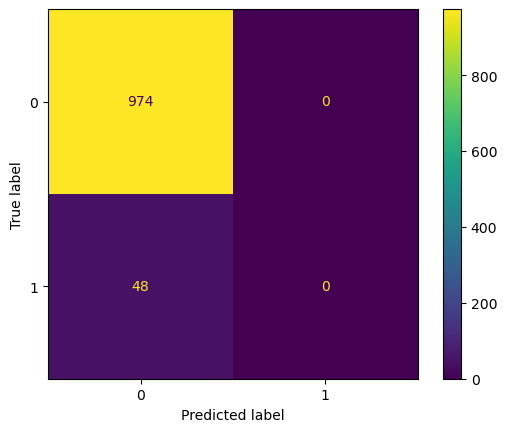

In [91]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_svc1)).plot()

**Decision Tree Classifier**

In [92]:
from sklearn.tree import DecisionTreeClassifier

In [93]:
dtc=DecisionTreeClassifier()

In [94]:
pipe_dtc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('dtc',dtc)
])

In [95]:
pipe_dtc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4, 5, 6, 9])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', StandardScaler(),
                                                  slice(0, None, None))])),
                ('dtc', DecisionTreeClassifier())])

In [96]:
y_pred_Dtc=pipe_dtc.predict(X_test)

In [97]:
accuracy_score(y_test,y_pred_Dtc)

0.9148727984344422

## Model Evaluation

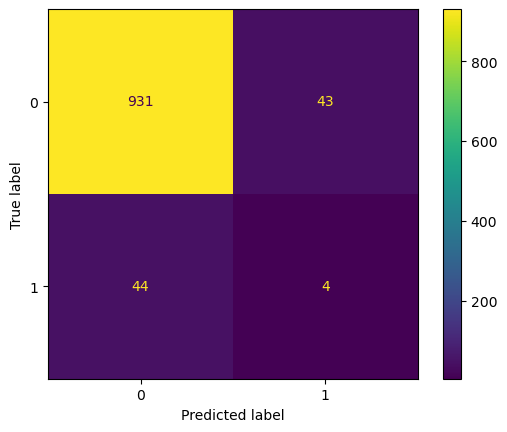

In [98]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_Dtc)).plot()

In [99]:
print(classification_report(y_test,y_pred_Dtc))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       974
           1       0.09      0.08      0.08        48

    accuracy                           0.91      1022
   macro avg       0.52      0.52      0.52      1022
weighted avg       0.91      0.91      0.91      1022



## Improve The Model

In [100]:
# Create the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [101]:
# Create the GridSearchCV instance
gs_dtc = GridSearchCV(dtc, param_grid, cv=5)

In [102]:
pipe_gs_dtc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('gs_dtc',gs_dtc)
])

In [103]:
pipe_gs_dtc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4, 5, 6, 9])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', StandardScaler(),
                                                  slice(0, None, None))])),
                ('gs_dtc',
                 GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [None, 5, 10, 15],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [2, 5, 10]}))])

In [104]:
pipe_gs_dtc.score(X_train,y_train)

0.951320939334638

In [105]:
y_pred_dtc=pipe_gs_dtc.predict(X_test)

In [106]:
accuracy_score(y_test,y_pred_dtc)

0.9510763209393346

## Model Evaluation 

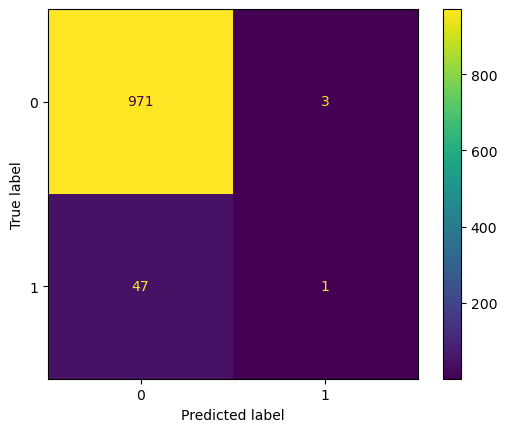

In [107]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_dtc)).plot()

In [108]:
print(classification_report(y_test,y_pred_dtc))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       974
           1       0.25      0.02      0.04        48

    accuracy                           0.95      1022
   macro avg       0.60      0.51      0.51      1022
weighted avg       0.92      0.95      0.93      1022



**Random Forest Classifier**

In [109]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier

In [110]:
rfc=RandomForestClassifier()

In [111]:
pipe_rfc=Pipeline([
    ('tf1',tf1),
    ('rtc',rfc)
])

In [112]:
pipe_rfc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4, 5, 6, 9])])),
                ('rtc', RandomForestClassifier())])

In [113]:
pipe_rfc.score(X_train,y_train)

1.0

In [114]:
y_pred_rfc=pipe_rfc.predict(X_test)

In [115]:
accuracy_score(y_test,y_pred_rfc)

0.9530332681017613

## Model Evaluation

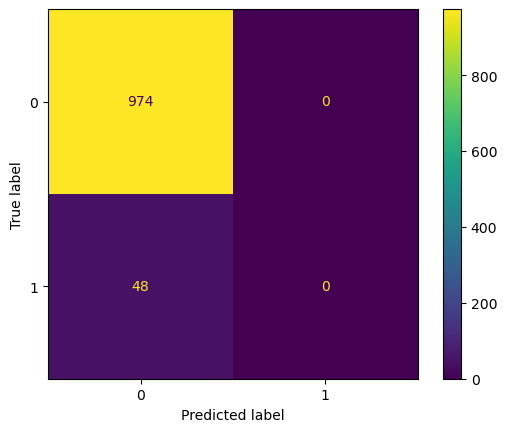

In [116]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_rfc)).plot()

In [117]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       974
           1       0.00      0.00      0.00        48

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Improve The Model
**Hyper Tuning for Random forest classifier**

In [118]:
# Create the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [119]:
# Create the GridSearchCV instance
gs_rfc = GridSearchCV(rfc, param_grid, cv=5)

In [120]:
pipe_gs_rfc=Pipeline([
    ('tf1',tf1),
    ('gs_rfc',gs_rfc),
])

In [121]:
pipe_gs_rfc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4, 5, 6, 9])])),
                ('gs_rfc',
                 GridSearchCV(cv=5, estimator=RandomForestClassifier(),
                              param_grid={'criterion': ['gini', 'entropy'],
                                          'max_depth': [None, 5, 10, 15],
                                          'min_samples_leaf': [1, 2, 4],
                                          'min_samples_split': [2, 5, 10],
                                          'n_estimators': [100, 200, 300]}))])

In [122]:
y_pred_gsrfc=pipe_gs_rfc.predict(X_test)

In [123]:
accuracy_score(y_test,y_pred_gsrfc)

0.9530332681017613

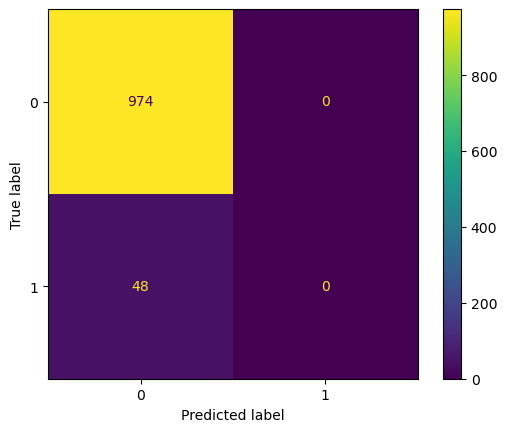

In [124]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_gsrfc)).plot()

In [125]:
print(classification_report(y_test,y_pred_gsrfc))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       974
           1       0.00      0.00      0.00        48

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.91      0.95      0.93      1022



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**AdaBoostClassifier**

In [126]:
adac=AdaBoostClassifier()

In [127]:
pipe_adac=Pipeline([
    ('tf1',tf1),
    ('adac',adac),
])

In [128]:
pipe_adac.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4, 5, 6, 9])])),
                ('adac', AdaBoostClassifier())])

In [129]:
y_pred_adac=pipe_adac.predict(X_test)

**Score on Train data**

In [130]:
pipe_adac.score(X_train,y_train)

0.9503424657534246

**Score on Test data**

In [131]:
accuracy_score(y_test,y_pred_adac)

0.952054794520548

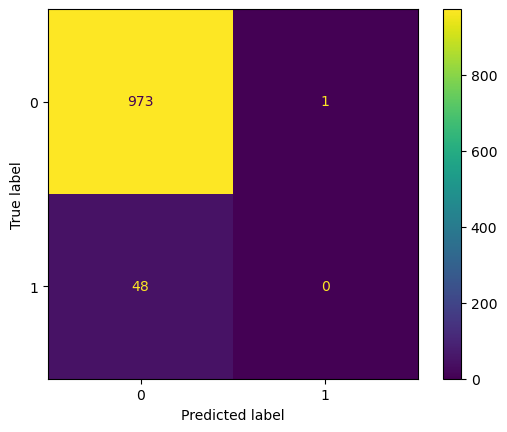

In [132]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_adac)).plot()

**Gradient Boosting Classifier**

In [133]:
gbc=GradientBoostingClassifier()

In [134]:
pipe_gbc=Pipeline([
    ('tf1',tf1),
    ('gbc',gbc),
])

In [135]:
pipe_gbc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4, 5, 6, 9])])),
                ('gbc', GradientBoostingClassifier())])

In [136]:
y_pred_gbc=pipe_gbc.predict(X_test)

**Score on Train data**

In [137]:
pipe_gbc.score(X_train,y_train)

0.9581702544031311

**Score on Test data**

In [138]:
accuracy_score(y_test,y_pred_gbc)

0.9471624266144814

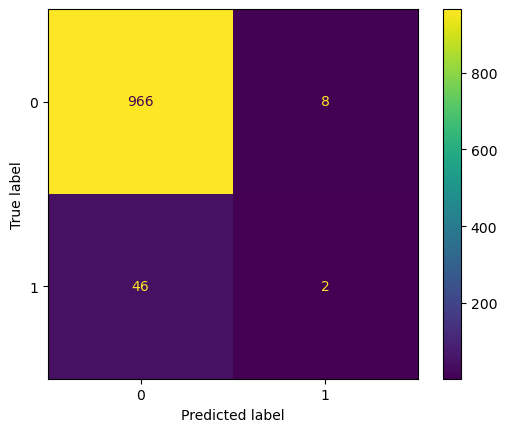

In [139]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_gbc)).plot()

**xgboost**

In [140]:
from xgboost import XGBClassifier,XGBRFClassifier

In [141]:
xgbc=XGBClassifier()
xgbrfc=XGBRFClassifier()

In [142]:
pipe_xgbc=Pipeline([
    ('tf1',tf1),
    ('xgbc',xgbc),
])

In [143]:
pipe_xgbc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4, 5, 6, 9])])),
                ('xgbc',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None,...e,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [144]:
y_pred_xgbc=pipe_xgbc.predict(X_test)

In [145]:
pipe_xgbc.score(X_train,y_train)

0.99779843444227

In [146]:
accuracy_score(y_test,y_pred_xgbc)

0.9481409001956947

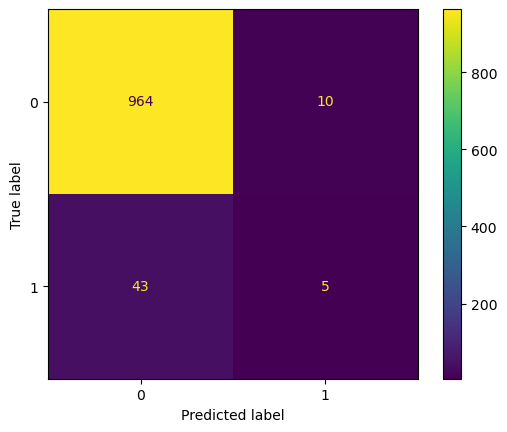

In [147]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_xgbc)).plot()

In [148]:
pipe_xgbrfc=Pipeline([
    ('tf1',tf1),
    ('xgbrfc',xgbrfc)
])

In [149]:
pipe_xgbrfc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4, 5, 6, 9])])),
                ('xgbrfc',
                 XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                                 colsample_bylevel=None, colsample_bytree=None,
                                 early_stopping_rounds=None,
                                 enable_categorical=False, eval_metric=None,
                                 feature_types=None, gamma=None, gpu_id=None,
                                 grow_p...tance_type=None,
                                 interaction_constraints=None, max_bin=None,
                                 max_cat_threshold=None, max_cat_to_onehot=None,
                                 max_delta_step=None, max_depth=None,
                                 max_leaves=None, min_child_weight=None,
                                 missing=nan, monotone_constraints=None,
                                 n_estimators=100, n_jobs=None,
                                 num_parallel_tree=None,
                                 objective='binary:logistic', predictor=None,
                                 random_state=None, reg_alpha=None, ...))])

In [150]:
y_pred_xgbrfc=pipe_xgbrfc.predict(X_test)

**Score on Train data**

In [151]:
pipe_xgbrfc.score(X_train,y_train)

0.9532778864970646

**Score on Test data**

In [152]:
accuracy_score(y_test,y_pred_xgbrfc)

0.9510763209393346

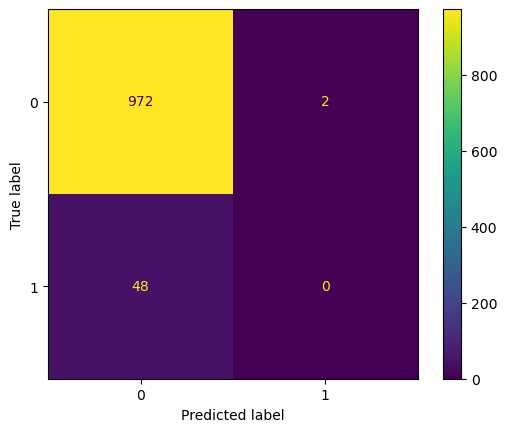

In [153]:
ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred_xgbrfc)).plot()

In [154]:
d={
    'Model Name':['Logistic Regression','K Neighbors Classifier','Support Vector Machine','Decision Tree Classifier','RandomForestClassifier','AdaBoost Classifier','Gradient Boosting Classifier','XGBClassifier','XGBRFClassifier'],
    'Score':[accuracy_score(y_test,y_pred_lgr),accuracy_score(y_test,y_pred_knn),accuracy_score(y_test,y_pred_svc),accuracy_score(y_test,y_pred_dtc),accuracy_score(y_test,y_pred_rfc),accuracy_score(y_test,y_pred_adac),accuracy_score(y_test,y_pred_gbc),accuracy_score(y_test,y_pred_xgbc),accuracy_score(y_test,y_pred_xgbrfc)]
}

In [155]:
d

{'Model Name': ['Logistic Regression',
  'K Neighbors Classifier',
  'Support Vector Machine',
  'Decision Tree Classifier',
  'RandomForestClassifier',
  'AdaBoost Classifier',
  'Gradient Boosting Classifier',
  'XGBClassifier',
  'XGBRFClassifier'],
 'Score': [0.9530332681017613,
  0.9530332681017613,
  0.9530332681017613,
  0.9510763209393346,
  0.9530332681017613,
  0.952054794520548,
  0.9471624266144814,
  0.9481409001956947,
  0.9510763209393346]}

In [156]:
score=pd.DataFrame(d)
score

,Model Name,Score
0,Logistic Regression,0.953033
1,K Neighbors Classifier,0.953033
2,Support Vector Machine,0.953033
3,Decision Tree Classifier,0.951076
4,RandomForestClassifier,0.953033
5,AdaBoost Classifier,0.952055
6,Gradient Boosting Classifier,0.947162
7,XGBClassifier,0.948141
8,XGBRFClassifier,0.951076


In [157]:
df.sample(3)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1361,Female,59.0,0,0,Yes,Private,Urban,89.96,28.1,Unknown,0
4491,Male,55.0,0,0,Yes,Self-employed,Urban,76.47,30.6,Unknown,0
4366,Male,66.0,0,0,Yes,Self-employed,Rural,189.82,28.8,formerly smoked,0


In [158]:
pipe_lgr.predict(pd.DataFrame([['Male',13.0,0,0,'No','Never_worked','Urban',85.08,14.6,'Unknown']],columns=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']))

array([0])

In [159]:
pipe_lgr.predict(pd.DataFrame([['Male',63.0,0,0,'Yes','Private','Rural',137.30,31.7,'formerly smoked']],columns=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']))

array([0])

In [160]:
pipe_knn.predict(pd.DataFrame([['Male',57.0,1,0,'Yes','Govt_job','Urban',78.92,27.7,'formerly smoked']],columns=['gender','age','hypertension','heart_disease','ever_married','work_type','Residence_type','avg_glucose_level','bmi','smoking_status']))

array([0])

In [161]:
from sklearn.neural_network import MLPClassifier

In [162]:
mlpc=MLPClassifier(activation='logistic')

In [163]:
pipe_mlpc=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('mlpc',mlpc)
])

In [164]:
pipe_mlpc.fit(X_train,y_train)

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4, 5, 6, 9])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', StandardScaler(),
                                                  slice(0, None, None))])),
                ('mlpc', MLPClassifier(activation='logistic'))])

In [165]:
pipe_mlpc.score(X_train,y_train)

0.9508317025440313

In [166]:
y_pred_mlpc=pipe_mlpc.predict(X_test)

In [167]:
accuracy_score(y_test,y_pred_mlpc)

0.9530332681017613

In [168]:
# Define the parameter grid with the hyperparameters to search over
param_grid = {
    'hidden_layer_sizes': [(50, 50), (100,)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
}

In [169]:
# Create an instance of GridSearchCV and fit it to the data
grid_search = GridSearchCV(mlpc, param_grid, cv=5)
pipe_mlpgs=Pipeline([
    ('tf1',tf1),
    ('tf2',tf2),
    ('gds',grid_search)
])

In [170]:
pipe_mlpgs.fit(X_train,y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptro

Pipeline(steps=[('tf1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onh', OneHotEncoder(),
                                                  [0, 4, 5, 6, 9])])),
                ('tf2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('tf1', StandardScaler(),
                                                  slice(0, None, None))])),
                ('gds',
                 GridSearchCV(cv=5,
                              estimator=MLPClassifier(activation='logistic'),
                              param_grid={'activation': ['relu', 'tanh'],
                                          'alpha': [0.0001, 0.001, 0.01],
                                          'hidden_layer_sizes': [(50, 50),
                                                                 (100,)],
                                          'solver': ['adam', 'sgd']}))])

In [171]:
# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

In [172]:
best_params

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 50),
 'solver': 'sgd'}

In [173]:
best_score

0.9510763033700131